# Heat Kernel Signatures

In [1]:
import os
import numpy as np
import scipy as sp
import scipy.sparse
from matplotlib import cm

In [2]:
import tinymesh as tms
from tinymesh import Mesh, get_mesh_laplacian, simplify_qem, get_heat_kernel_signatures
from viewer import Viewer

## Load mesh file

In [3]:
models_dir = "../../data/models"
filename = os.path.join(models_dir, "bunny.ply")
mesh = Mesh(filename)

In [4]:
# Simplify to reduce computational cost
mesh.fill_holes()
simplify_qem(mesh, 5000)
print("verts: {:d}, faces: {:d}".format(mesh.num_vertices(), mesh.num_faces()))

verts: 2502, faces: 5000


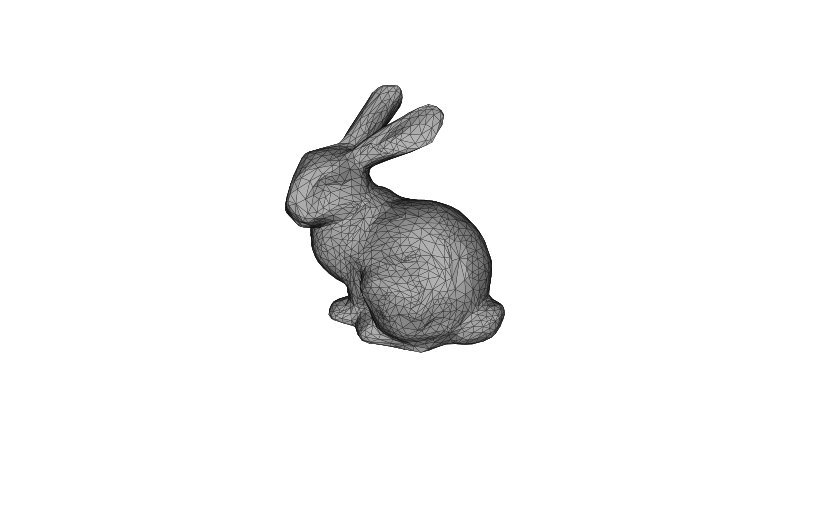

In [5]:
viewer = Viewer(800, 500)
viewer.lookat(3, 4, 5, 0, 0, 0, 0, 1, 0)
viewer.perspective(45, viewer.aspect, 1, 100)
viewer.mesh_visualization(mesh, wireframe=True)

## Adjacent Laplacian

In [6]:
L = get_mesh_laplacian(mesh, tms.MeshLaplace.ADJACENT)
hks = get_heat_kernel_signatures(L)

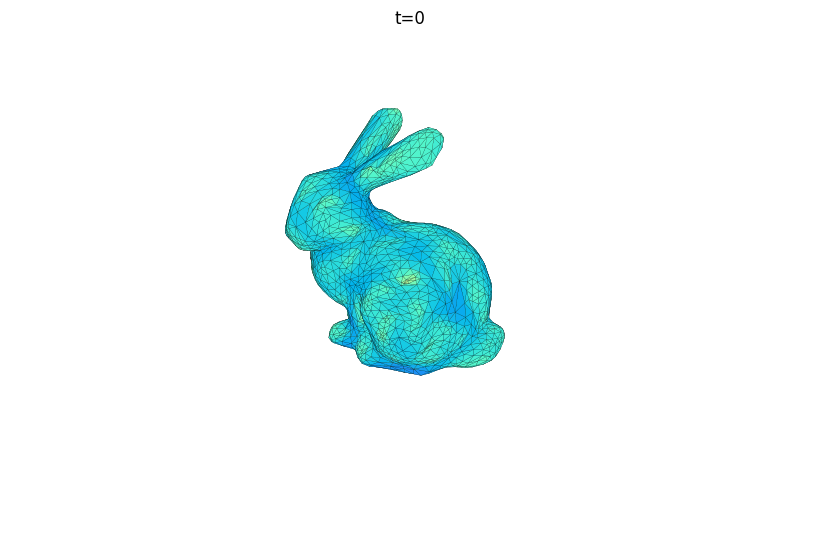

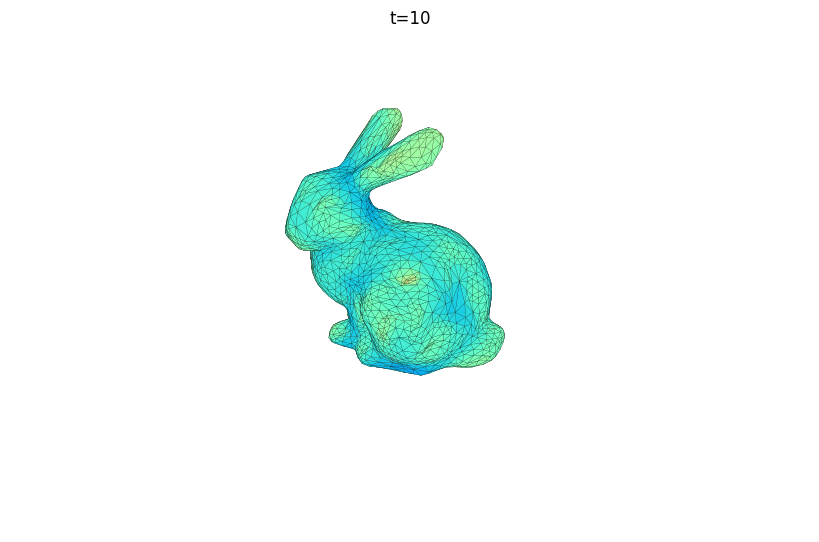

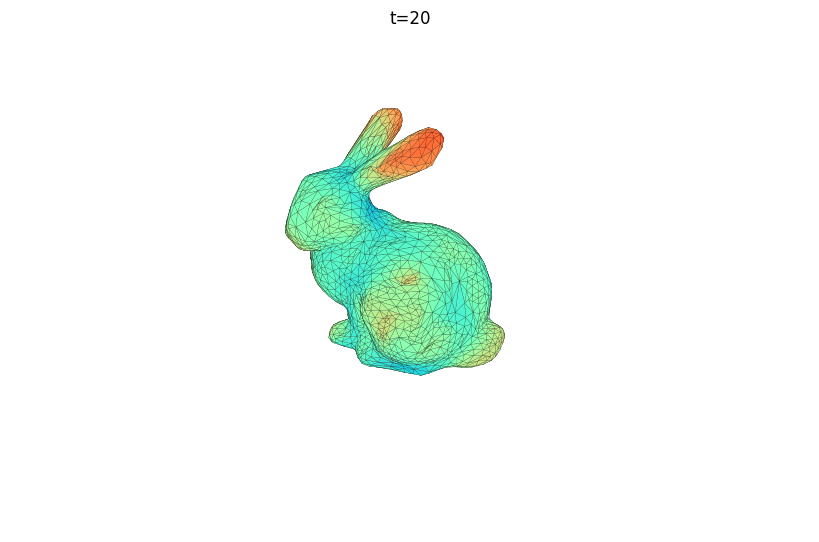

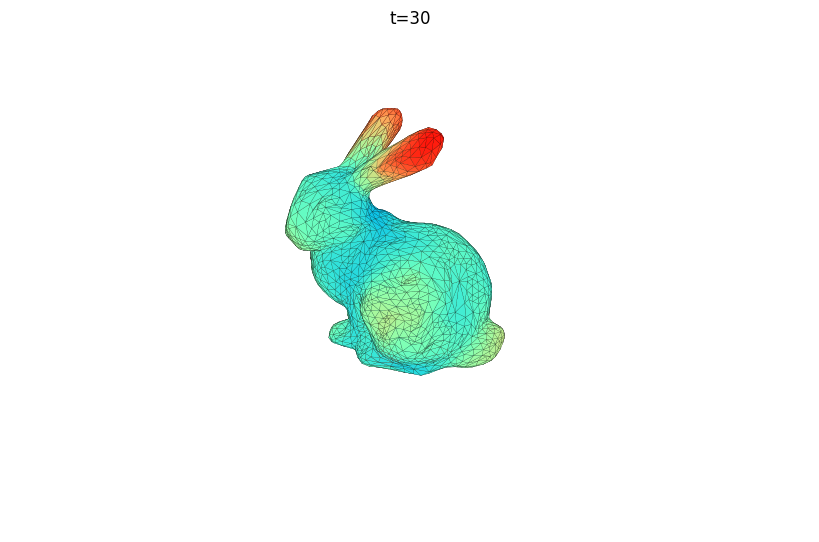

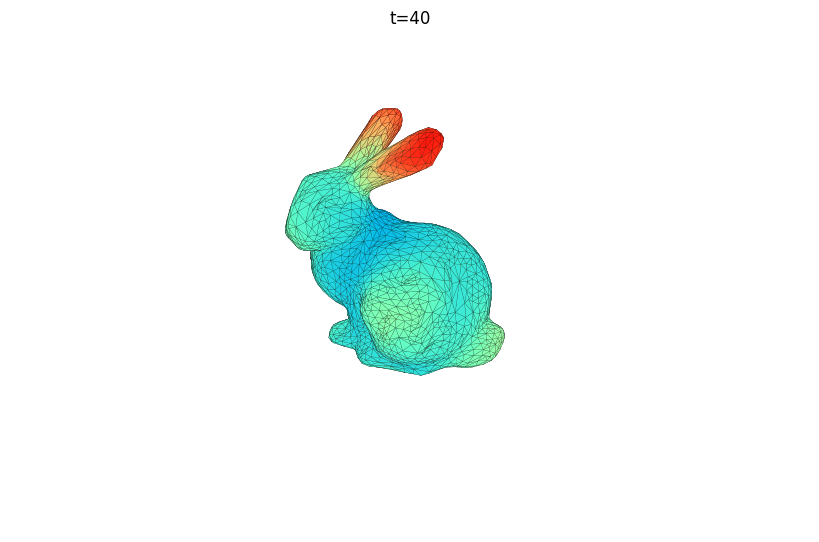

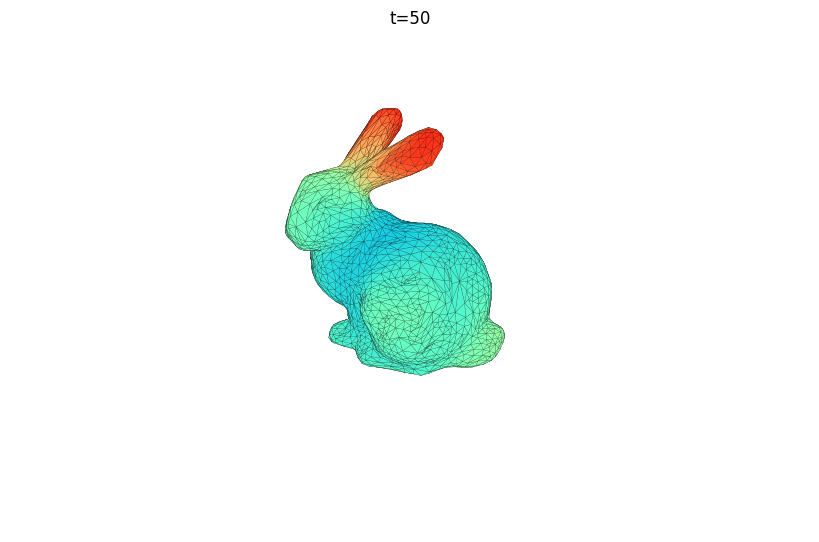

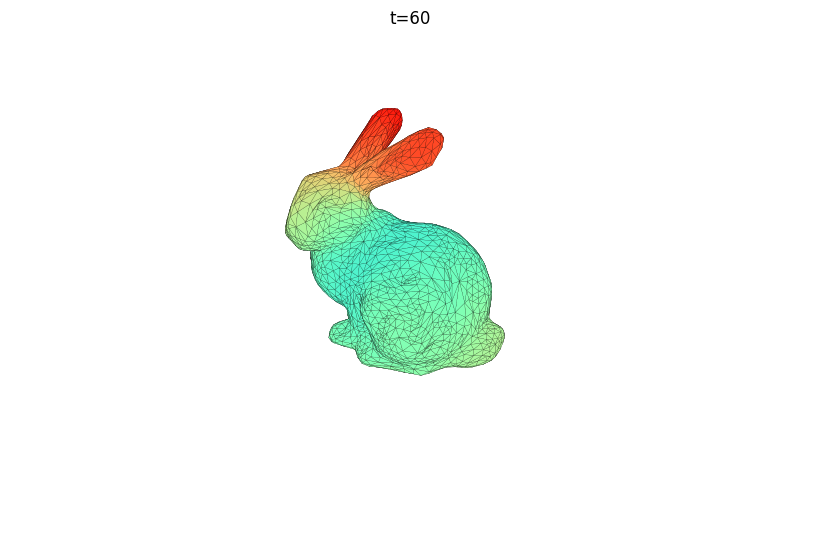

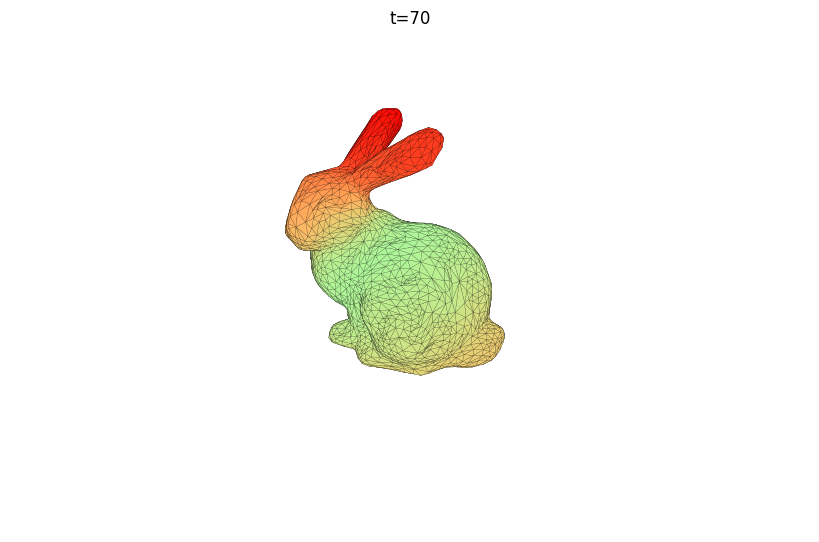

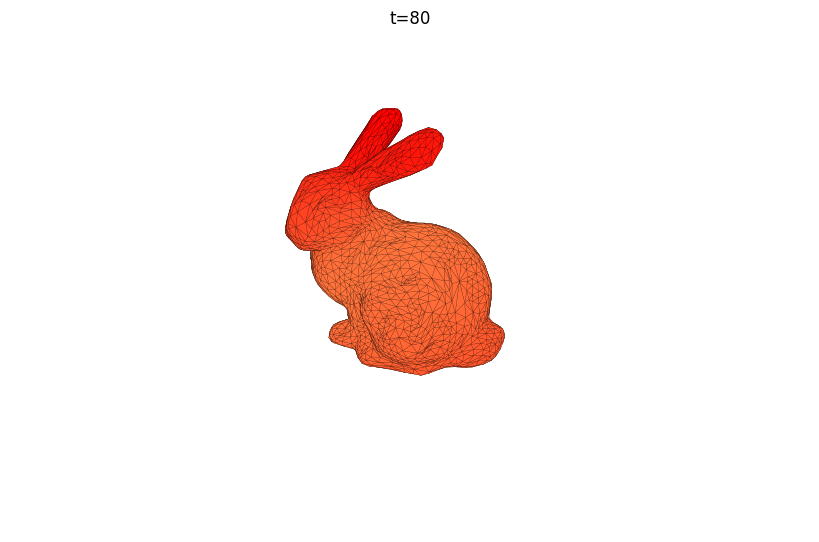

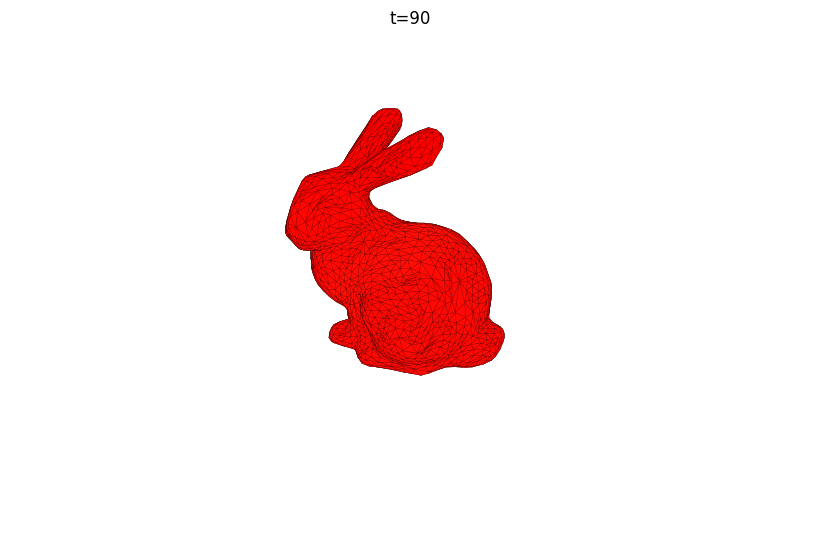

In [7]:
for i in range(0, 100, 10):
    v = hks[:, i]
    v = v.copy() / np.abs(v).max()
    colors = np.clip(v, -1.0, 1.0)
    viewer.mesh_visualization(mesh, colors=cm.rainbow(colors), title="t=%d" % i, wireframe=True, shade=False)

## Cotangent Laplacian

In [8]:
L = get_mesh_laplacian(mesh, tms.MeshLaplace.COTANGENT)
hks = get_heat_kernel_signatures(L)

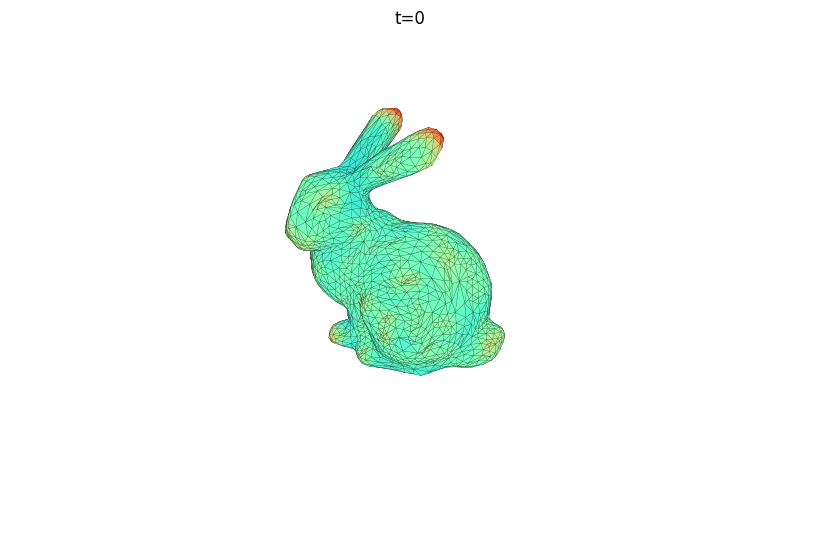

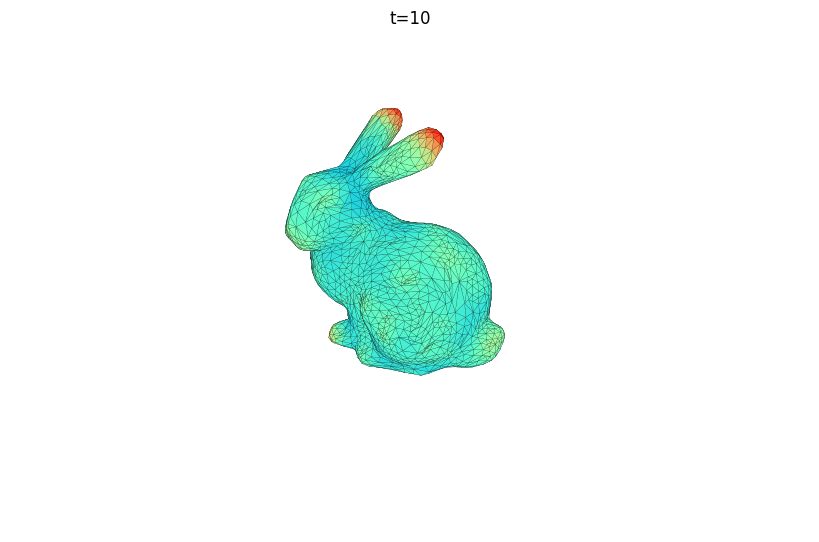

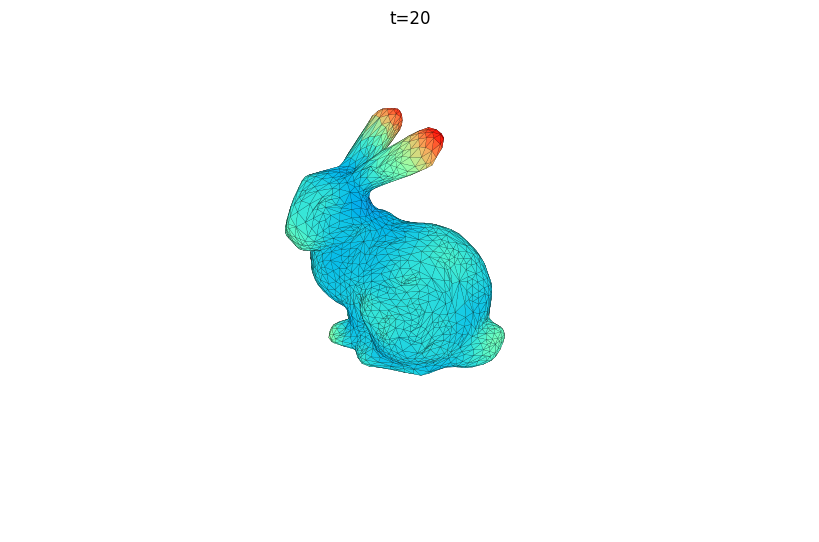

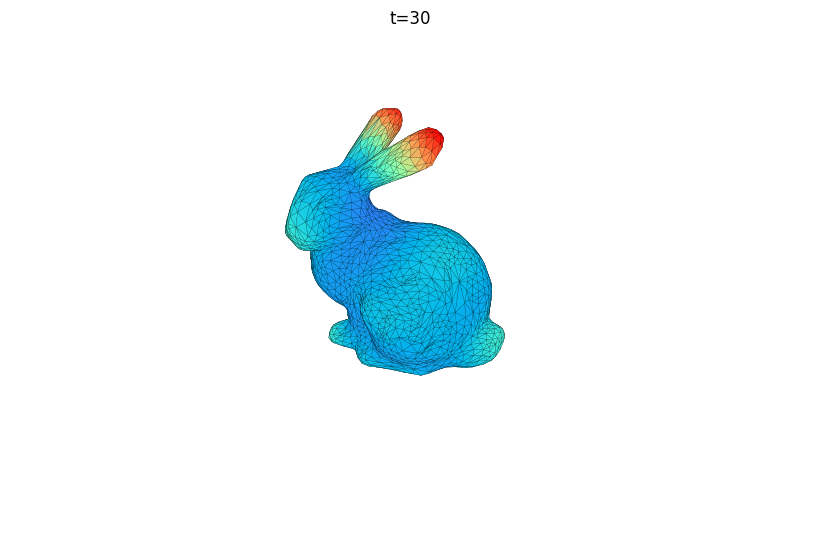

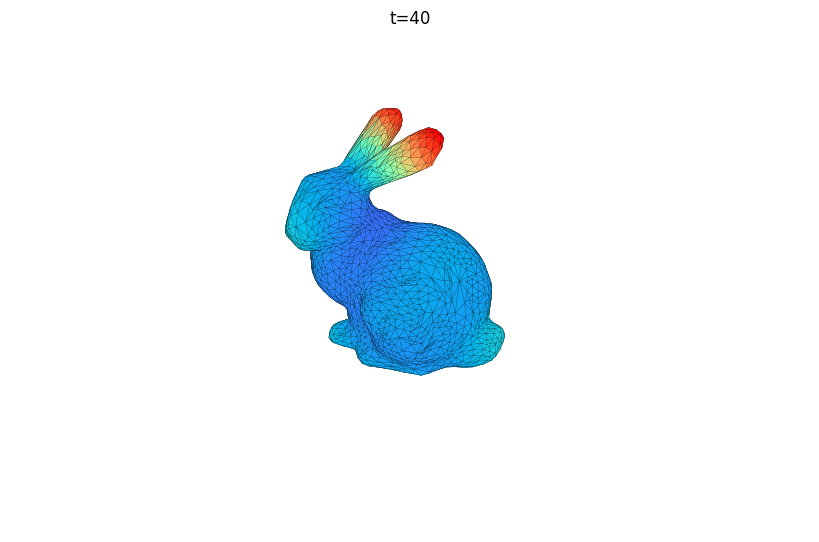

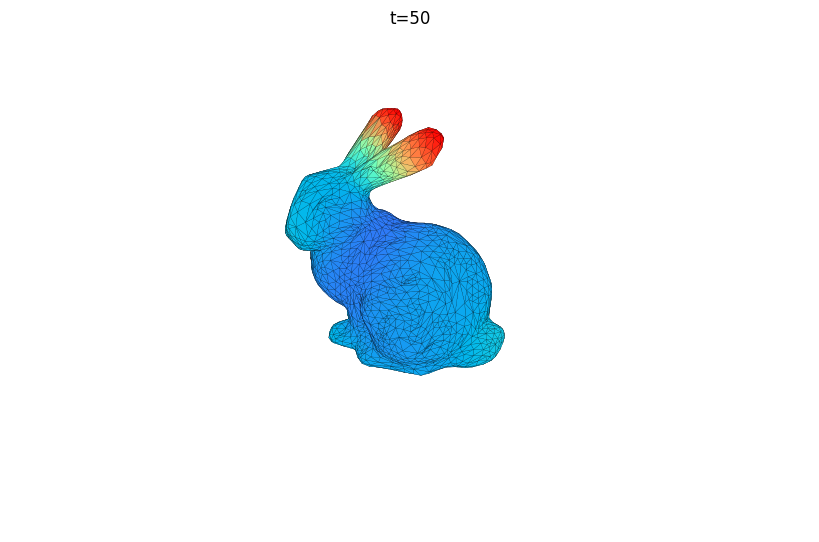

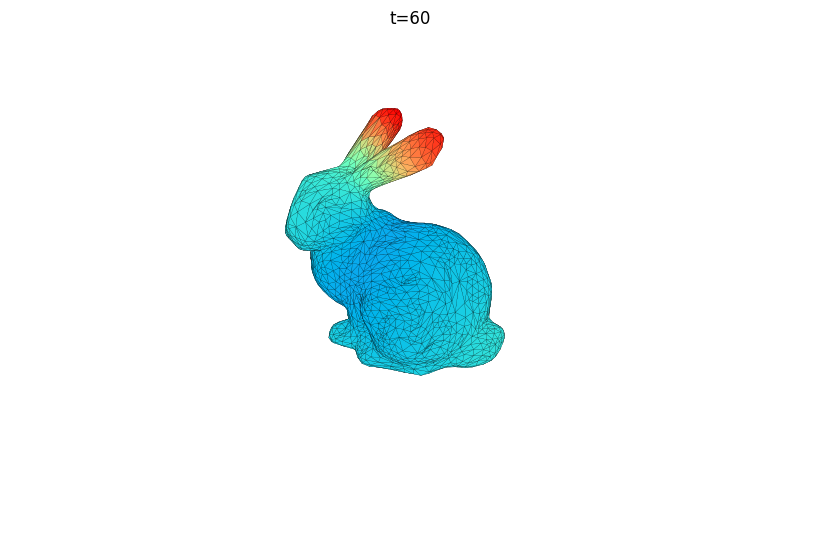

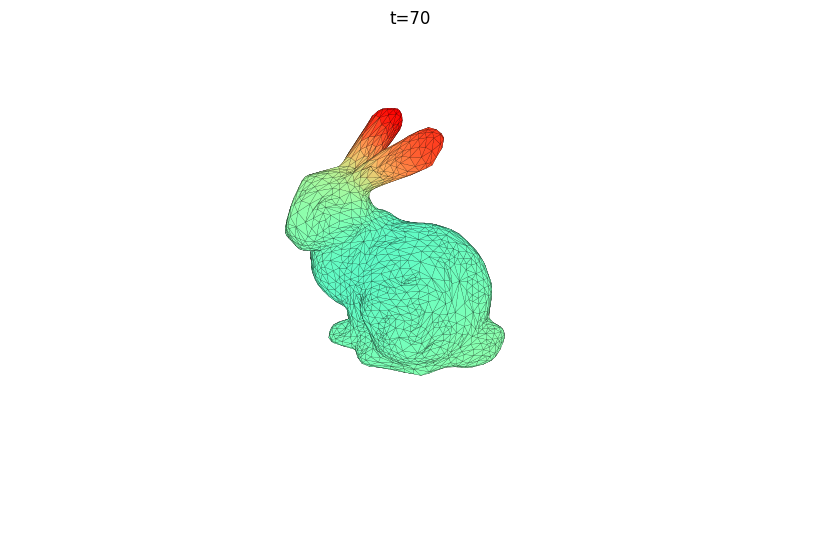

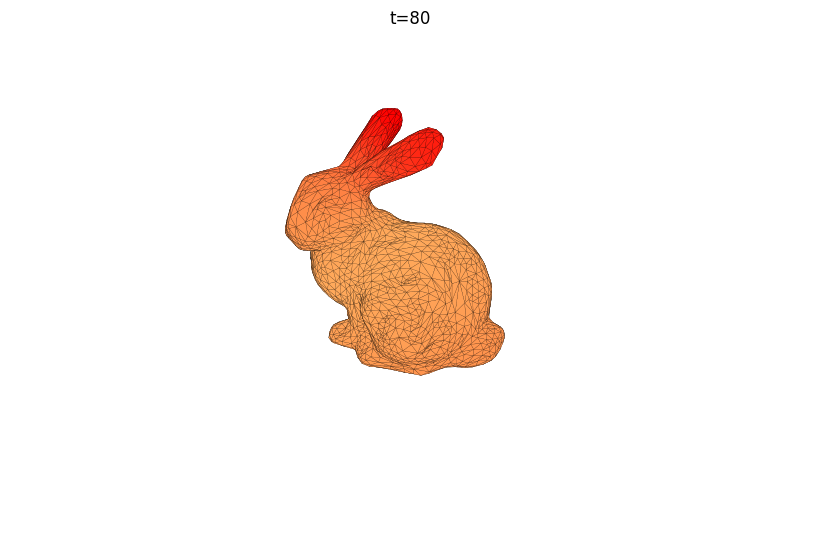

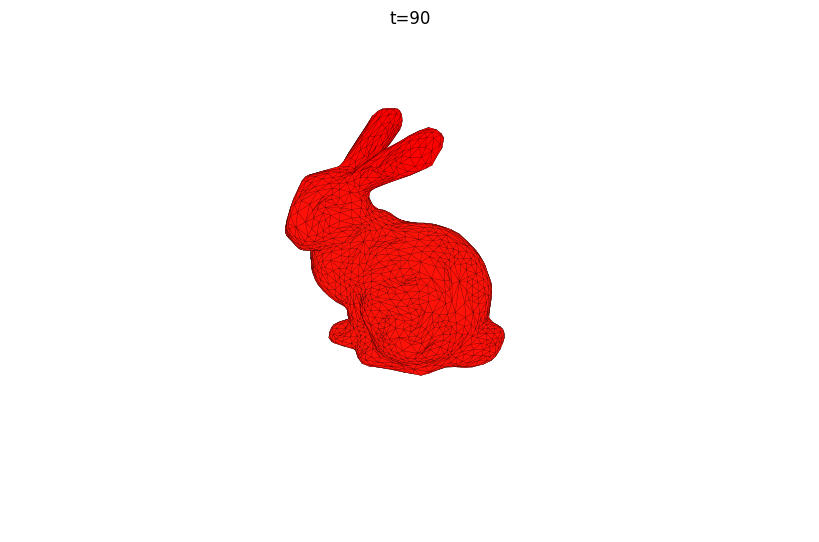

In [9]:
for i in range(0, 100, 10):
    v = hks[:, i]
    v = v.copy() / np.abs(v).max()
    colors = np.clip(v, -1.0, 1.0)
    viewer.mesh_visualization(mesh, colors=cm.rainbow(colors), title="t=%d" % i, wireframe=True, shade=False)

## Belkin et al. 2008

In [10]:
L = get_mesh_laplacian(mesh, tms.MeshLaplace.BELKIN08)
hks = get_heat_kernel_signatures(L)

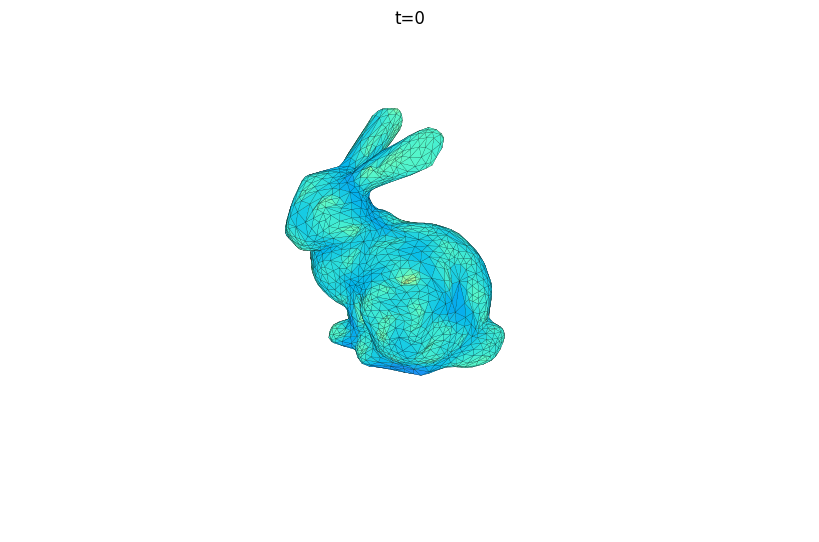

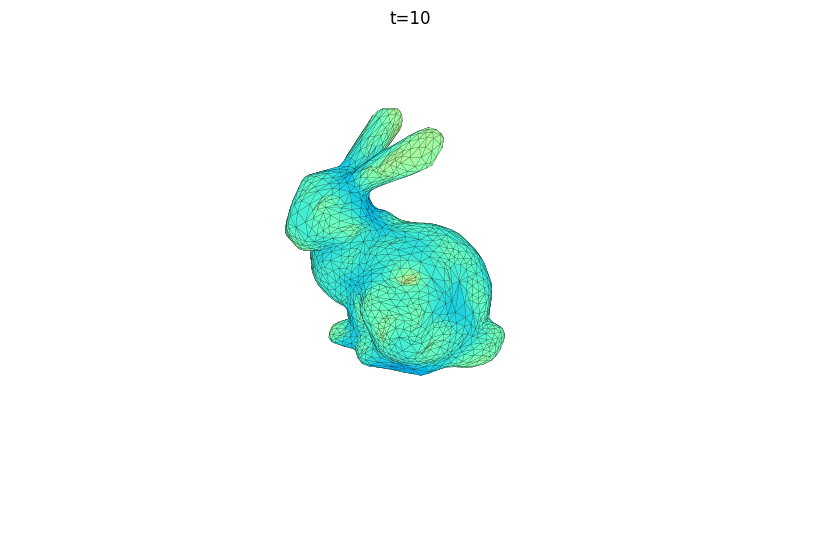

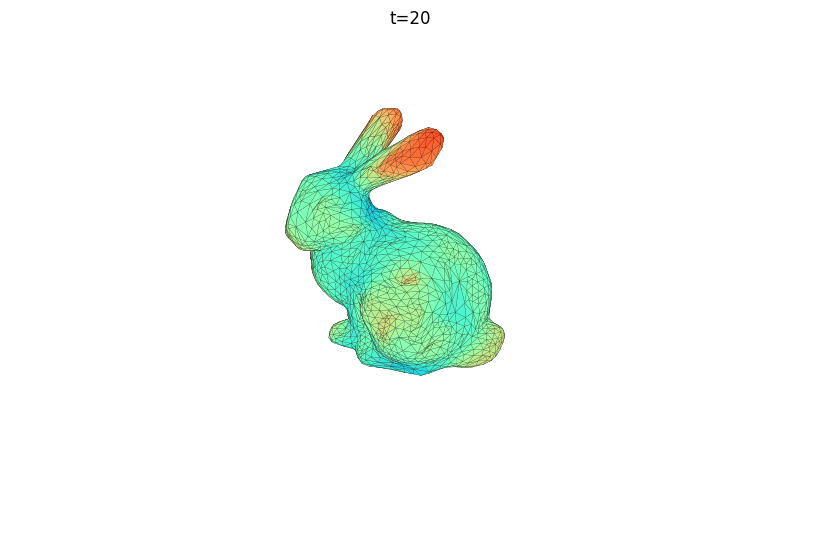

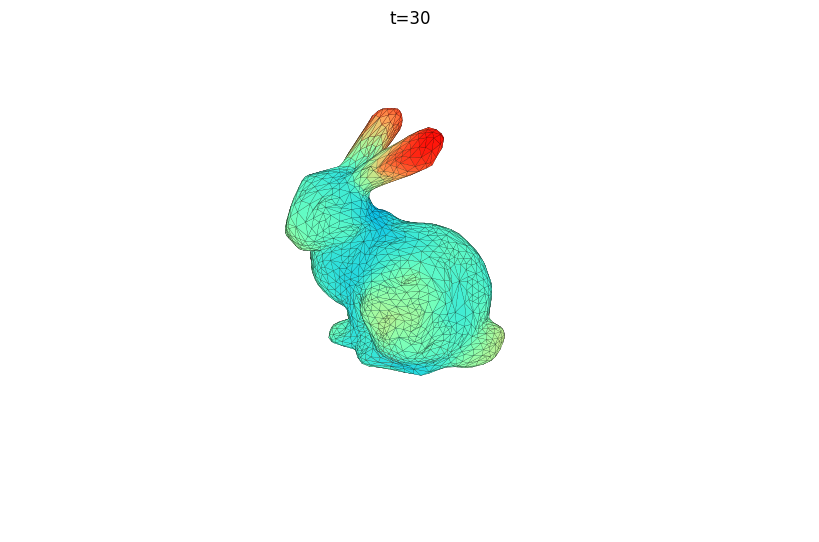

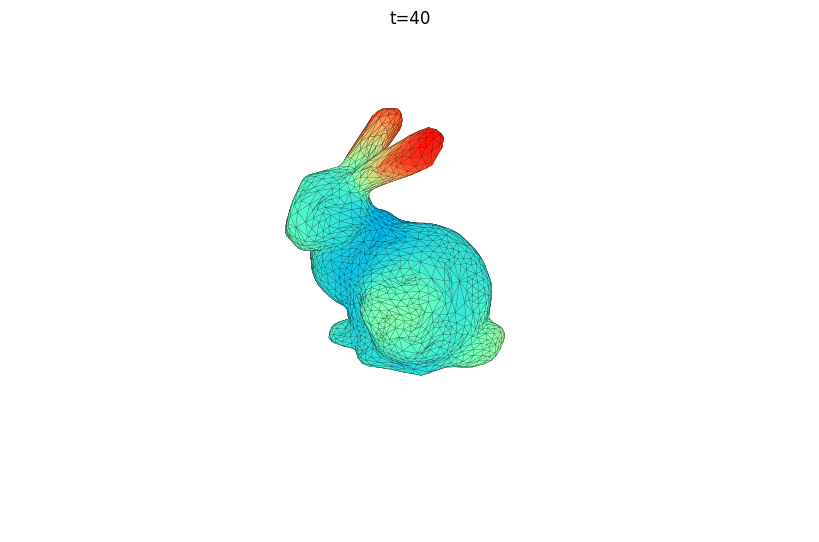

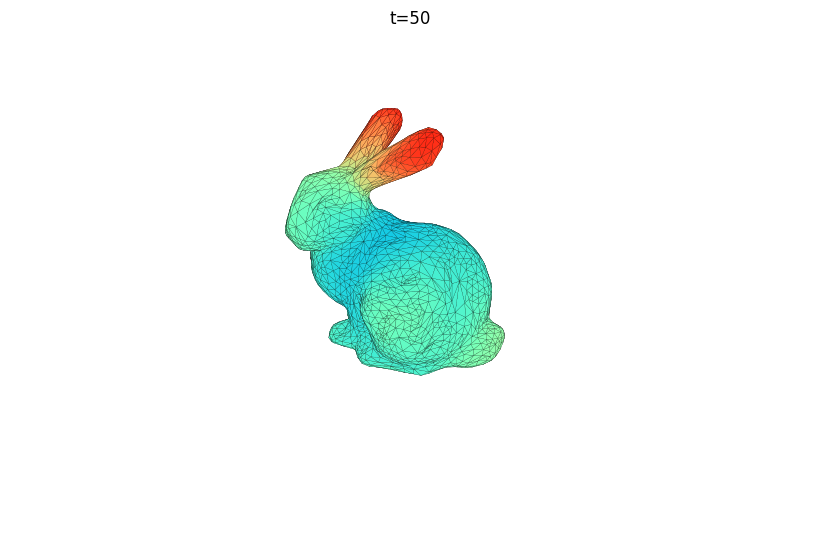

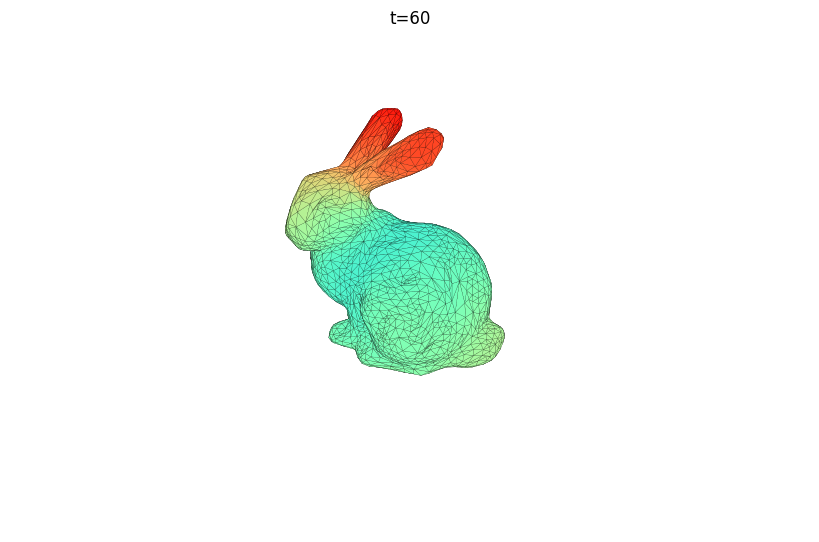

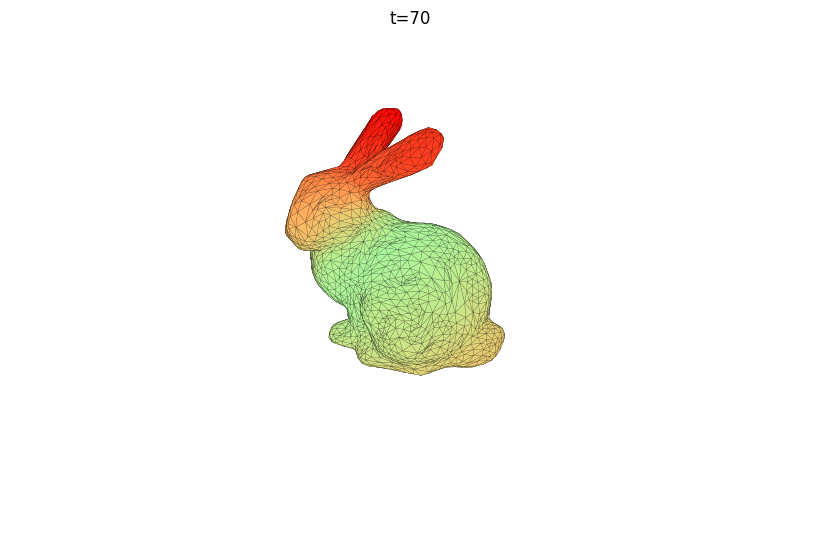

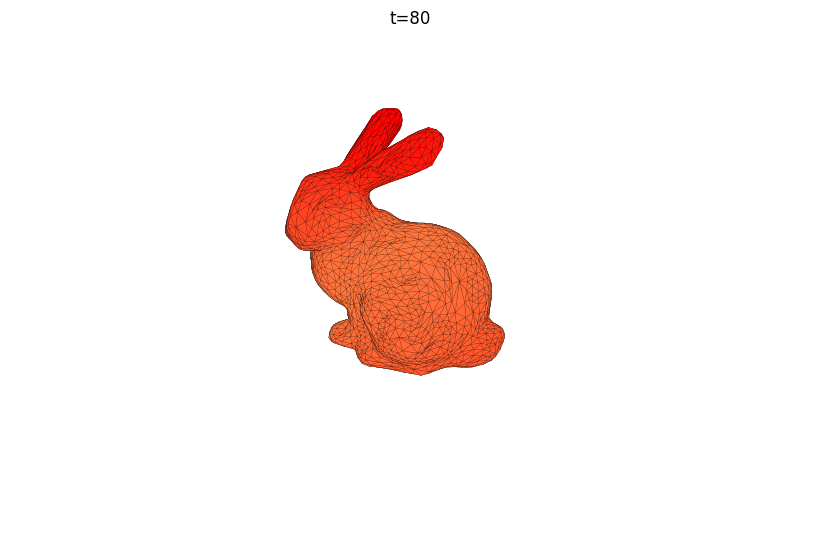

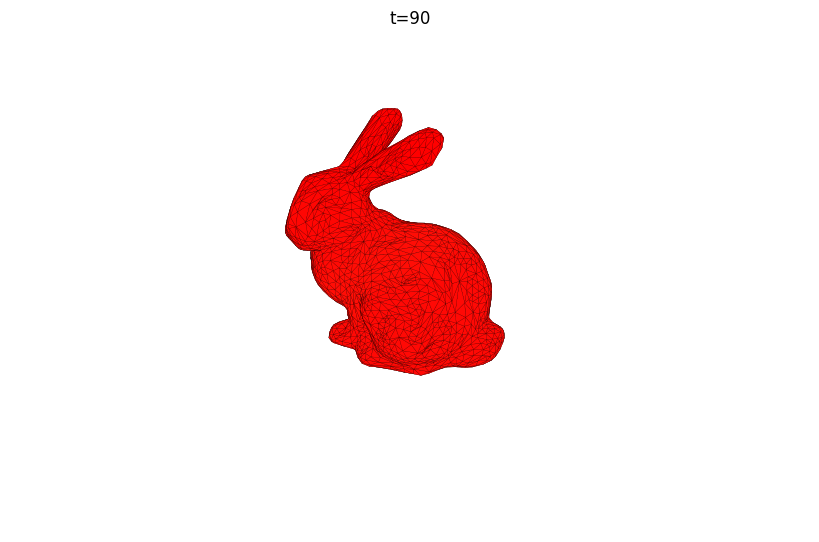

In [11]:
for i in range(0, 100, 10):
    v = hks[:, i]
    v = v.copy() / np.abs(v).max()
    colors = np.clip(v, -1.0, 1.0)
    viewer.mesh_visualization(mesh, colors=cm.rainbow(colors), title="t=%d" % i, wireframe=True, shade=False)